# **CSST 106**

**Verdad, Jane Benneth Dione**

**BSCS-4B**

**October 2024**

**Machine Problem 4**

# **Feature Extraction and Image Matching in Computer Vision**

In [7]:
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84


In [8]:
!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


In [9]:
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

Cloning into 'opencv'...
remote: Enumerating objects: 337922, done.
remote: Counting objects: 100% (1142/1142), done.
remote: Compressing objects: 100% (900/900), done.
remote: Total 337922 (delta 497), reused 596 (delta 201), pack-reused 336780 (from 1)
Receiving objects: 100% (337922/337922), 528.81 MiB | 22.83 MiB/s, done.
Resolving deltas: 100% (235603/235603), done.
Updating files: 100% (7568/7568), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41838, done.
remote: Counting objects: 100% (1588/1588), done.
remote: Compressing objects: 100% (1153/1153), done.
remote: Total 41838 (delta 611), reused 1041 (delta 345), pack-reused 40250 (from 1)
Receiving objects: 100% (41838/41838), 150.38 MiB | 23.79 MiB/s, done.
Resolving deltas: 100% (25744/25744), done.


In [14]:
%cd opencv
!mkdir build
%cd build

!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..

!make -j8
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/matmul.avx512_skx.cpp.o
[  7%] Linking CXX shared library ../../lib/libopencv_core.so
[  7%] Built target opencv_core
[  7%] Processing OpenCL kernels (imgproc)
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/flann.cpp.o
[  8%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/miniflann.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  8%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  8%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  8%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.cpp.o
[  8%] Linking CXX executable 

In [1]:
!pip install opencv-python-headless
!pip install opencv-contrib-python

**Task 1: Harris Corner Detection**

Saving rose.jpeg to rose.jpeg


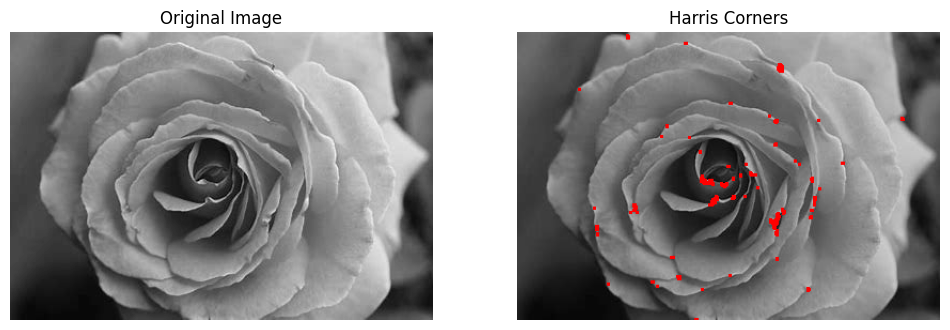

In [28]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image_path):
    # Load the grayscale image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Image not found.")
        return

    # Harris Corner Detection
    dst = cv2.cornerHarris(image, blockSize=2, ksize=3, k=0.04)

    # Dilate result for better visibility of corners
    dst = cv2.dilate(dst, None)

    # Convert grayscale image to color (for marking corners in red)
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    color_image[dst > 0.01 * dst.max()] = [0, 0, 255]  # Red color for corners

    # Display original and corner-detected images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)), plt.title('Harris Corners')
    plt.axis('off')
    plt.show()

# Upload an image
uploaded = files.upload()

# Use the uploaded file path
for filename in uploaded.keys():
    harris_corner_detection(filename)


**Task 2: HOG Feature Extraction**

Saving rose.jpeg to rose (1).jpeg


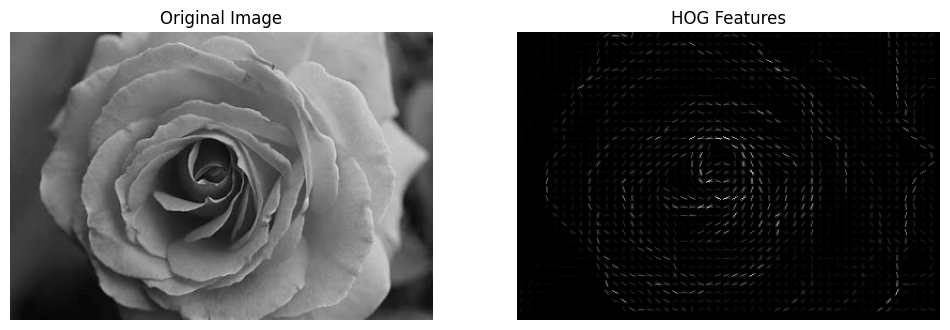

In [29]:
from skimage.feature import hog
import cv2
import matplotlib.pyplot as plt

def hog_feature_extraction(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Image not found.")
        return

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Extract HOG features and the HOG image for visualization
    hog_features, hog_image = hog(
        gray_image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True,
        channel_axis=None
    )

    # Display the original image and HOG visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Features')
    plt.axis('off')

    plt.show()

# Upload an image
uploaded = files.upload()

# Use the uploaded file path
for filename in uploaded.keys():
    hog_feature_extraction(filename)

**Task 3: ORB Feature Extraction and Matching**

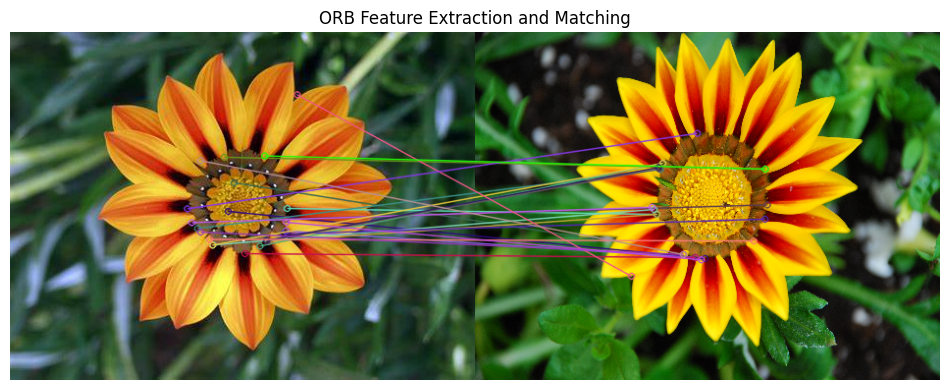

In [24]:
import cv2
import matplotlib.pyplot as plt

def orb_feature_matching(image_path1, image_path2):
    # Load the images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)
    if image1 is None or image2 is None:
        print("One or both images not found.")
        return

    # Resize both images to the same dimensions
    height, width = image1.shape[:2]
    image2 = cv2.resize(image2, (width, height))

    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Initialize the ORB detector
    orb = cv2.ORB_create()
    # Detect keypoints and compute descriptors for both images
    keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

    # Initialize FLANN-based matcher
    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=1)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    # Match descriptors using FLANN
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Filter matches using Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Draw matches
    img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Convert to RGB for correct color display with matplotlib
    img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

    # Display the matching keypoints
    plt.figure(figsize=(12, 6))
    plt.imshow(img_matches)
    plt.title("ORB Feature Extraction and Matching")
    plt.axis('off')
    plt.show()

# Paths
image_path1 = "/content/flower1.jpeg"
image_path2 = "/content/flower2.jpeg"

# Run ORB feature matching
orb_feature_matching(image_path1, image_path2)


**Task 4: SIFT and SURF Feature Extraction**

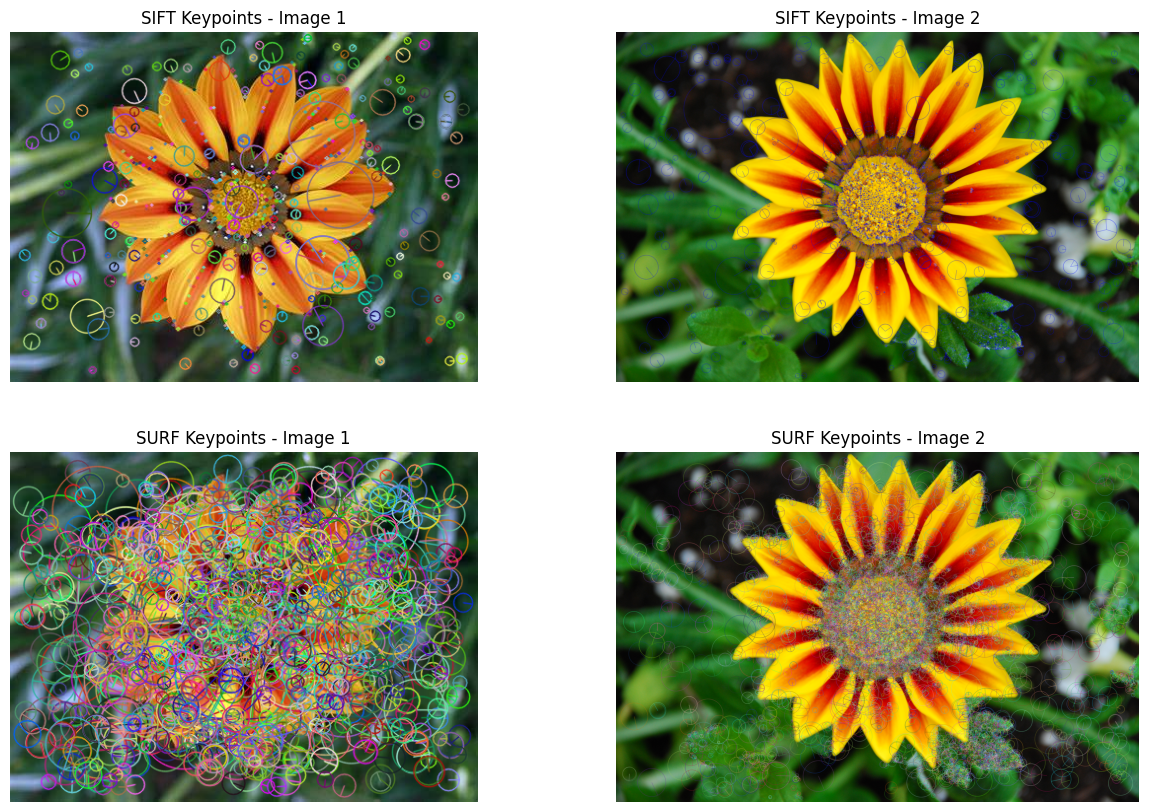

In [11]:
import cv2
import matplotlib.pyplot as plt

def sift_and_surf_feature_extraction(image_path1, image_path2):
    # Load the images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)
    if image1 is None or image2 is None:
        print("One or both images not found.")
        return

    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT and SURF detectors
    sift = cv2.SIFT_create()

    try:
        surf = cv2.xfeatures2d.SURF_create()
    except AttributeError:
        print("SURF not available in this OpenCV version.")
        return

    # Detect keypoints and descriptors with SIFT
    keypoints1_sift, descriptors1_sift = sift.detectAndCompute(gray1, None)
    keypoints2_sift, descriptors2_sift = sift.detectAndCompute(gray2, None)

    # Detect keypoints and descriptors with SURF
    keypoints1_surf, descriptors1_surf = surf.detectAndCompute(gray1, None)
    keypoints2_surf, descriptors2_surf = surf.detectAndCompute(gray2, None)

    # Draw keypoints for SIFT
    sift_image1 = cv2.drawKeypoints(image1, keypoints1_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    sift_image2 = cv2.drawKeypoints(image2, keypoints2_sift, None, color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Draw keypoints for SURF
    surf_image1 = cv2.drawKeypoints(image1, keypoints1_surf, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    surf_image2 = cv2.drawKeypoints(image2, keypoints2_surf, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display the SIFT keypoints
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(sift_image1, cv2.COLOR_BGR2RGB))
    plt.title('SIFT Keypoints - Image 1')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(sift_image2, cv2.COLOR_BGR2RGB))
    plt.title('SIFT Keypoints - Image 2')
    plt.axis('off')

    # Display the SURF keypoints
    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(surf_image1, cv2.COLOR_BGR2RGB))
    plt.title('SURF Keypoints - Image 1')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(surf_image2, cv2.COLOR_BGR2RGB))
    plt.title('SURF Keypoints - Image 2')
    plt.axis('off')

    plt.show()

# Paths
image_path1 = "/content/flower1.jpeg"
image_path2 = "/content/flower2.jpeg"

# Run SIFT and SURF feature extraction
sift_and_surf_feature_extraction(image_path1, image_path2)


**Task 5: Feature Matching using Brute-Force Matcher**

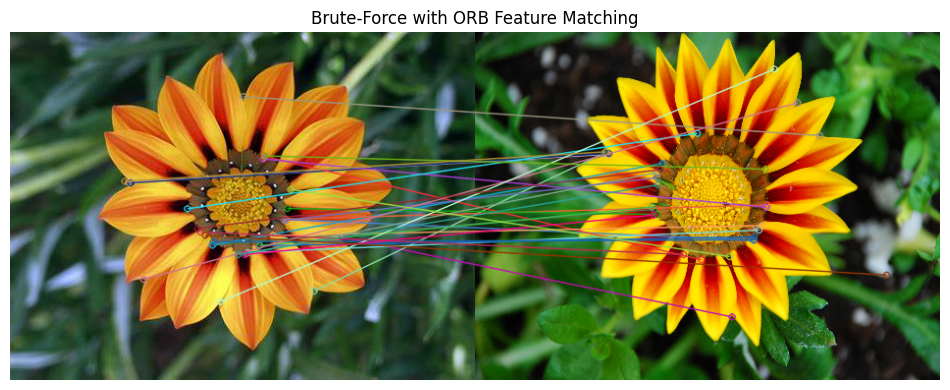

In [31]:
import cv2
import matplotlib.pyplot as plt

def brute_force_feature_matching(image_path1, image_path2):
    # Load the images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)
    if image1 is None or image2 is None:
        print("One or both images not found.")
        return

    # Resize the second image to match the first image's dimensions
    height, width = image1.shape[:2]
    image2 = cv2.resize(image2, (width, height))

    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors with ORB
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Initialize Brute-Force Matcher and match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches by distance (best matches first)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw matches
    match_img = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the matching keypoints
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
    plt.title('Brute-Force with ORB Feature Matching')
    plt.axis('off')
    plt.show()

# Path
image_path1 = "/content/flower1.jpeg"
image_path2 = "/content/flower2.jpeg"

# Run Brute-Force feature matching
brute_force_feature_matching(image_path1, image_path2)


**Task 6: Image Segmentation using Watershed Algorithm**

Saving rose.jpeg to rose (2).jpeg


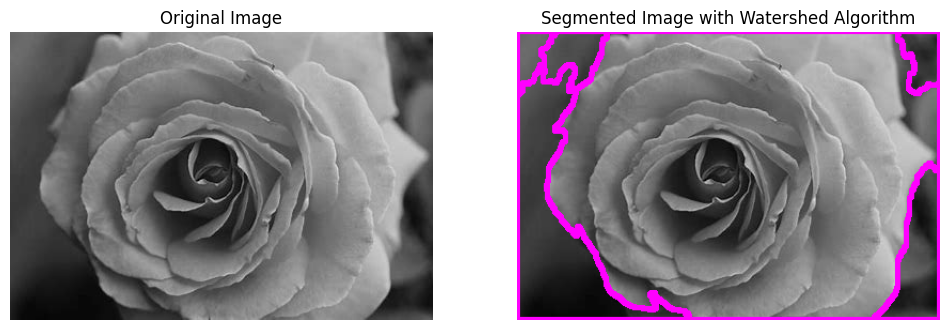

In [30]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

def watershed_segmentation(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Image not found.")
        return

    # Make a copy of the original image for displaying
    original_image = image.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to separate foreground and background
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Apply morphological opening to remove noise
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=5)

    # Determine sure background area by dilating the binary image
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Find the sure foreground area by using distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)

    # Find unknown region by subtracting sure foreground from sure background
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Label markers for the Watershed algorithm
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1  # Ensure background is not 0
    markers[unknown == 255] = 0

    # Apply Watershed
    markers = cv2.watershed(image, markers)
    boundaries = (markers == -1).astype(np.uint8)
    boundaries = cv2.dilate(boundaries, kernel, iterations=2)
    image[boundaries == 1] = [255, 0, 255]

    # Display original and segmented images side by side
    plt.figure(figsize=(12, 6))

    # Show original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Show segmented image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Image with Watershed Algorithm')
    plt.axis('off')

    plt.show()

# Upload an image
uploaded = files.upload()

# Use the uploaded file path
for filename in uploaded.keys():
    watershed_segmentation(filename)
